In [1]:
import xml.etree.ElementTree as ET
src_ = "{http://www.srcML.org/srcML/src}"

api_names = ["Sienna", "Azureus", "Prefuse", "JackRabbit", "Jung", "jEdit"]
api_oc_sum = []
api_oc_mean = []
api_is_sum = []
api_is_mean = []
api_il_sum = []
api_il_mean = []

api_n_files = []
api_n_blank_lines = []
api_n_comments = []
api_n_lines_of_code = []

In [2]:
import statistics

def strength(parameter):
    par = str(parameter.text).lower()
        
    if par == "boolean" or "exception" in par or "throwable" in par:
        return 0
    elif par in ["int", "char", "byte", "field", "long", "short"]:
        return 1
    elif par in ["real", "double", "float"]:
        return 2
    elif par in ["string", "list", "json", "iterable", "date"] or "array" in par or "set" in par:
        return 3
    elif par == "object" or "class" in par or "map" in par:
        return 6
    elif "file" in par:
        return 10
    else:
        #print(par)
        return -1

# Count API operation complexity and interface size
def count_api_oc_and_is(): 
    api_oc = []
    api_is = []
    api_il = []

    for class_ in root:

        total_function_operation_complexity = 0
        total_function_interface_size = 0
        total_function_interaction_level = 0
        
        total_attribute_size = 0
        for attribute in class_.findall(".//" + src_ + "block/" + src_ + "decl_stmt"):
            attribute_type = attribute.findall(".//" + src_ + "decl/" + src_ + "type/" + src_ + "name")
            if str(attribute_type[0].text) == "None":
                val = strength(attribute_type[0][0])
            else:
                val = strength(attribute_type[0])
                
            if(val>=0):
                 total_attribute_size += val
                            
        for function in class_.findall(".//" + src_ + "function"):
            n_parameters = 0
            function_operation_complexity = 0

            parameter_types = function.findall(".//" + src_ + "parameter_list/" + src_ + "parameter/" + src_ + "decl/" +
                                   src_ + "type/" + src_ + "name")
            for par_type in parameter_types:
                val = 0
                if str(par_type.text) == "None":
                    val = strength(par_type[0])
                else:
                    val = strength(par_type)
                    
                if val>=0:
                    function_operation_complexity += val
                    n_parameters += 1
                    
            total_function_operation_complexity += function_operation_complexity
            total_function_interface_size += function_operation_complexity + n_parameters
            total_function_interaction_level += total_attribute_size *  function_operation_complexity

        api_oc.append(total_function_operation_complexity)
        api_is.append(total_function_interface_size)
        api_il.append(total_function_interaction_level)
    
    #print(api_oc)
    print("API OC - Summation:", sum(api_oc), ", Mean:", statistics.mean(api_oc))
    api_oc_sum.append(sum(api_oc))
    api_oc_mean.append(statistics.mean(api_oc))
    
    #print(api_is)
    print("API IS - Summation:", sum(api_is), ", Mean:", statistics.mean(api_is))
    api_is_sum.append(sum(api_is))
    api_is_mean.append(statistics.mean(api_is))
    
    #print(api_il)
    print("API IL - Summation:", sum(api_il), ", Mean:", statistics.mean(api_il))
    api_il_sum.append(sum(api_il))
    api_il_mean.append(statistics.mean(api_il))

## APIs

### Siena
https://github.com/mandubian/siena

In [3]:
tree = ET.parse('siena.xml')
root = tree.getroot()

# Values come from cloc
api_n_files.append(167)
api_n_blank_lines.append(4186)
api_n_comments.append(5456)
api_n_lines_of_code.append(19944)

count_api_oc_and_is()

API OC - Summation: 4686 , Mean: 28.059880239520957
API IS - Summation: 6271 , Mean: 37.550898203592816
API IL - Summation: 88833 , Mean: 531.934131736527


### Azureus
https://sourceforge.net/projects/azureus/files/

In [4]:
tree = ET.parse('azureus.xml')
root = tree.getroot()

#Values come from cloc
api_n_files.append(3619)
api_n_blank_lines.append(233435)
api_n_comments.append(129623)
api_n_lines_of_code.append(633247)

count_api_oc_and_is()

API OC - Summation: 53114 , Mean: 14.676429953025698
API IS - Summation: 81489 , Mean: 22.51699364465322
API IL - Summation: 1872688 , Mean: 517.4600718430505


### Prefuse
https://github.com/prefuse/Prefuse

In [5]:
tree = ET.parse('prefuse.xml')
root = tree.getroot()

#Values come from cloc
api_n_files.append(445)
api_n_blank_lines.append(9128)
api_n_comments.append(27672)
api_n_lines_of_code.append(42574)

count_api_oc_and_is()

API OC - Summation: 5820 , Mean: 14.441687344913152
API IS - Summation: 8890 , Mean: 22.05955334987593
API IL - Summation: 64428 , Mean: 159.8709677419355


### Apache Jackrabbit
https://github.com/apache/jackrabbit

In [6]:
tree = ET.parse('jackrabbit.xml')
root = tree.getroot()

#Values come from cloc
api_n_files.append(3408)
api_n_blank_lines.append(67897)
api_n_comments.append(214618)
api_n_lines_of_code.append(362089)

count_api_oc_and_is()

API OC - Summation: 24975 , Mean: 7.981783317353787
API IS - Summation: 40985 , Mean: 13.098434004474273
API IL - Summation: 357086 , Mean: 114.12144455097476


### Jung
https://github.com/jrtom/jung

In [7]:
tree = ET.parse('jung.xml')
root = tree.getroot()

#Values come from cloc
api_n_files.append(494)
api_n_blank_lines.append(8310)
api_n_comments.append(15021)
api_n_lines_of_code.append(41305)

count_api_oc_and_is()

API OC - Summation: 2002 , Mean: 4.570776255707763
API IS - Summation: 3023 , Mean: 6.901826484018265
API IL - Summation: 16713 , Mean: 38.157534246575345


### jEdit
https://github.com/albfan/jEdit

In [8]:
tree = ET.parse('jedit.xml')
root = tree.getroot()

#Values come from cloc
api_n_files.append(575)
api_n_blank_lines.append(20434)
api_n_comments.append(48619)
api_n_lines_of_code.append(119275)

count_api_oc_and_is()

API OC - Summation: 10415 , Mean: 18.08159722222222
API IS - Summation: 15688 , Mean: 27.23611111111111
API IL - Summation: 234411 , Mean: 406.9635416666667


## Clustering

In [9]:
import pandas as pd
df = pd.DataFrame({'Name': api_names, 'api_oc_sum': api_oc_sum, 'api_oc_mean': api_oc_mean, 'api_is_sum': api_is_sum, 'api_is_mean': api_is_mean,
                  'api_il_sum': api_il_sum, 'api_il_mean': api_il_mean, 'api_n_files': api_n_files, 'api_n_blank_lines': api_n_blank_lines,
                  'api_n_comments': api_n_comments, 'api_n_lines_of_code': api_n_lines_of_code})
df

,Name,api_oc_sum,api_oc_mean,api_is_sum,api_is_mean,api_il_sum,api_il_mean,api_n_files,api_n_blank_lines,api_n_comments,api_n_lines_of_code
0,Sienna,4686,28.059880,6271,37.550898,88833,531.934132,167,4186,5456,19944
1,Azureus,53114,14.676430,81489,22.516994,1872688,517.460072,3619,233435,129623,633247
2,Prefuse,5820,14.441687,8890,22.059553,64428,159.870968,445,9128,27672,42574
3,JackRabbit,24975,7.981783,40985,13.098434,357086,114.121445,3408,67897,214618,362089
4,Jung,2002,4.570776,3023,6.901826,16713,38.157534,494,8310,15021,41305
5,jEdit,10415,18.081597,15688,27.236111,234411,406.963542,575,20434,48619,119275


In [11]:
df["api_oc_sum_by_lc"] = df["api_oc_sum"]/df["api_n_lines_of_code"]
df["api_is_sum_by_lc"] = df["api_is_sum"]/df["api_n_lines_of_code"]
df["api_il_sum_by_lc"] = df["api_il_sum"]/df["api_n_lines_of_code"]
df2 = df[["Name", "api_oc_sum_by_lc", "api_oc_mean", "api_is_sum_by_lc", "api_is_mean", "api_il_sum_by_lc", "api_il_mean"]]
df2

,Name,api_oc_sum_by_lc,api_oc_mean,api_is_sum_by_lc,api_is_mean,api_il_sum_by_lc,api_il_mean
0,Sienna,0.234958,28.059880,0.314430,37.550898,4.454122,531.934132
1,Azureus,0.083876,14.676430,0.128684,22.516994,2.957279,517.460072
2,Prefuse,0.136703,14.441687,0.208813,22.059553,1.513318,159.870968
3,JackRabbit,0.068975,7.981783,0.113190,13.098434,0.986183,114.121445
4,Jung,0.048469,4.570776,0.073187,6.901826,0.404624,38.157534
5,jEdit,0.087319,18.081597,0.131528,27.236111,1.965299,406.963542


In [12]:
import sklearn.cluster as cluster
import warnings
warnings.filterwarnings('ignore')

kmeans = cluster.KMeans(n_clusters=2, init="k-means++")
kmeans = kmeans.fit(df2[["api_oc_sum_by_lc", "api_oc_mean", "api_is_sum_by_lc", "api_is_mean", "api_il_sum_by_lc", "api_il_mean"]])
df2['Clusters'] = kmeans.labels_
#df2['Clusters'] = df2['Clusters'].replace({0: "Low"})
#sns.scatterplot(x="api_oc_sum_by_lc", y="api_is_sum_by_lc", hue = 'Clusters', data = df2)
df2

,Name,api_oc_sum_by_lc,api_oc_mean,api_is_sum_by_lc,api_is_mean,api_il_sum_by_lc,api_il_mean,Clusters
0,Sienna,0.234958,28.059880,0.314430,37.550898,4.454122,531.934132,1
1,Azureus,0.083876,14.676430,0.128684,22.516994,2.957279,517.460072,1
2,Prefuse,0.136703,14.441687,0.208813,22.059553,1.513318,159.870968,0
3,JackRabbit,0.068975,7.981783,0.113190,13.098434,0.986183,114.121445,0
4,Jung,0.048469,4.570776,0.073187,6.901826,0.404624,38.157534,0
5,jEdit,0.087319,18.081597,0.131528,27.236111,1.965299,406.963542,1


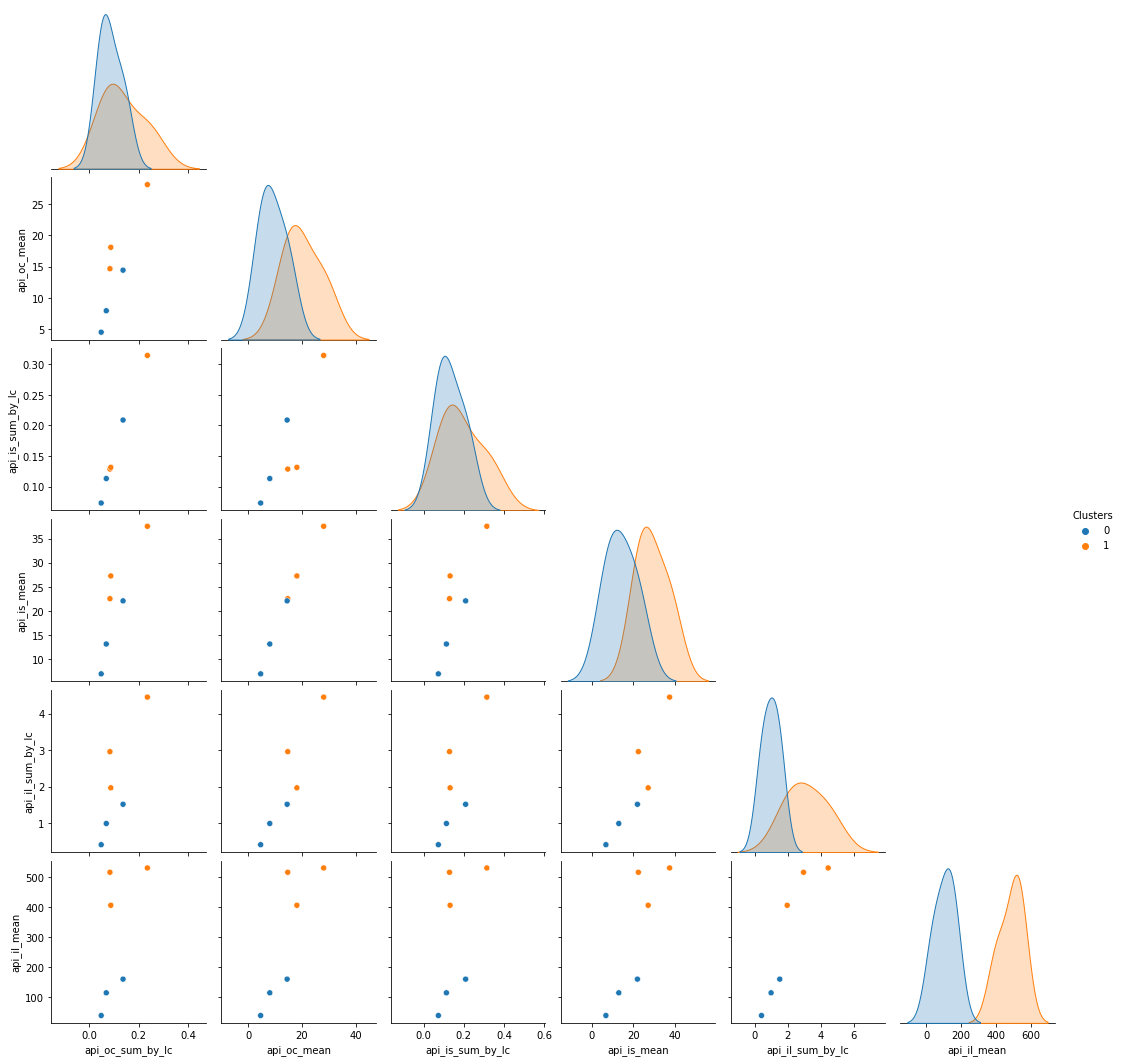

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df2, vars=df2[["api_oc_sum_by_lc", "api_oc_mean", "api_is_sum_by_lc", "api_is_mean", "api_il_sum_by_lc", "api_il_mean"]], hue = 'Clusters', corner=True)
plt.show()